# OOP II: Building Classes
## Key Concepts

In [1]:
x = [1,5,4]
x.sort()
x

[1, 4, 5]

In [2]:
x = [1, 5, 4]
x.sort()
x.__class__

list

## Defining Your Own Classes
### A Consumer Class

In [5]:
class Consumer:
    def __init__(self,w):
        self.wealth = w
        
    def earn(self, y):
        self.wealth += y
        
    def spend(self, x):
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficent Funds")
        else:
            self.wealth = new_wealth        

In [6]:
c1 = Consumer(10)
c1.spend(5)
c1.wealth

5

In [7]:
c1.earn(15)
c1.spend(100)

Insufficent Funds


In [8]:
c1 = Consumer(10)
c2 = Consumer (12)
c2.spend(4)
c2.wealth

8

In [9]:
c1.wealth

10

In [10]:
c1.__dict__

{'wealth': 10}

In [11]:
c2.__dict__

{'wealth': 8}

In [12]:
print(Consumer.__dict__)

{'__module__': '__main__', '__init__': <function Consumer.__init__ at 0x7f1b401e46a8>, 'earn': <function Consumer.earn at 0x7f1b401e4510>, 'spend': <function Consumer.spend at 0x7f1b401e4268>, '__dict__': <attribute '__dict__' of 'Consumer' objects>, '__weakref__': <attribute '__weakref__' of 'Consumer' objects>, '__doc__': None}


In [13]:
c1 = Consumer(10)
c1.earn(10)
c1.wealth

20

## Example: The Solow Grown Model

$$ k_{t+1} = \frac{szk^{\alpha}_t + (1 - \gamma)k_t}{1 + n} $$

- s: Es una tasa de ahorro 
- z: Es un parámetro de productividad
- $\alpha$: Es la participación del capital en los ingresos del norte
- $\gamma$: Es la tasa de depreciación

In [27]:
class Solow:
    def __init__(self,
                     n = 0.05, # Rango de crecimiento poblacional
                     s = 0.25, # Ratio de ahorro
                     gamma = 0.1, # Ratio de Depresiacion
                     alpha = 0.3, # Labor compartida
                     z = 2.0, # Productividad
                     k = 1.0): # Current capital stock
        self.n, self.s, self.gamma, self.alpha, self.z = n, s, gamma, alpha, z
        self.k = k
    
    def h(self):
        #Evaluar parametros
        n, s, gamma, alpha, z = self.n, self.s, self.gamma, self.alpha, self.z
        return (s * z * self.k**alpha + (1 - gamma) * self.k)/(1 + n)
    
    def update(self):
        self.k = self.h()
    
    def steady_state(self):
        n, s, gamma, alpha, z = self.n, self.s, self.gamma, self.alpha, self.z
        return ((s * z)/(n + gamma))**(1/ (1 - alpha))
    
    def generate_sequence(self, t):
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path
    
    

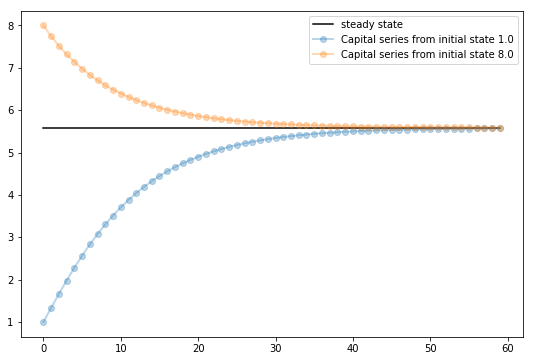

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

s1 = Solow()
s2 = Solow(k=8.0)

T = 60
fig, ax = plt.subplots(figsize=(9,6))

ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

for s in s1, s2:
    lb = f'Capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.3, label=lb)

ax.legend()
plt.show()

## A Market

- Curva de la demanda $Q = a_d - b_dp$
- Curva de la oferta $Q = a_z + b_z(p - t)$


In [9]:
from scipy.integrate import quad

class Market:
    def __init__(self, ad, bd, az, bz, tax):
        self.ad, self.bd, self.az, self.bz, self.tax =ad, bd, az, bz, tax
        if ad < az:
            raise ValueError('Demanda insuficiente')
    
    def price(self):
        # Retorna el precio de equilibrio
        return (self.ad - self.az + self.bz * self.tax)/(self.bd + self.bz)
    
    def quantity(self):
        # Retorna la cantidad de equilibrio
        return self.ad - self.bd * self.price()
    
    def consumer_surp(self):
        # Calcular el excedente del consumidor
        # Área de cómputo bajo función de demanda inversa
        integrand = lambda x: (self.ad / self.bd) - (1 / self.bd) * x
        area, error = quad(integrand, 0, self.quantity())
        return area - self.price() * self.quantity()
    
    def taxrev(self):
        # Retorna los ingresos fiscales
        return self.tax * self.quantity()

    def inverse_demand(self,x):
        return self.ad / self.bd - (1 / self.bd) * x
    
    def inverse_supply(self, x):
        # Calcula la curva de oferta
        return -(self.az / self.bz) + (1 / self.bz) * x + self.tax
        
    def inverse_supply_no_tax(self, x):
        # Calcula la curva de oferta sin impuesto
        return -(self.az / self.bz) + (1 /self.bz) * x
        

In [6]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
print("Precio de equilibrio = ", m.price())
print("Oferta del Vendedor = ", m.consumer_surp())

Precio de equilibrio =  18.5
Oferta del Vendedor =  33.0625


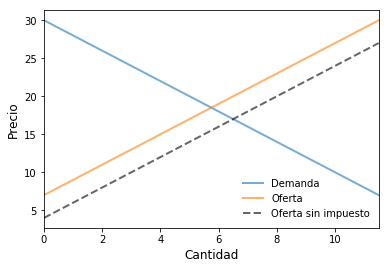

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)

q_max = m.quantity()*2
q_grid = np.linspace(0.0, q_max, 100)
pd = m.inverse_demand(q_grid)
ps = m.inverse_supply(q_grid)
psno = m.inverse_supply_no_tax(q_grid)

fig, ax = plt.subplots()
ax.plot(q_grid, pd, lw=2, alpha=0.6, label='Demanda')
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='Oferta')
ax.plot(q_grid, psno, '--k' ,lw=2, alpha=0.6, label='Oferta sin impuesto')

ax.set_xlabel('Cantidad', fontsize=12)
ax.set_xlim(0,q_max)
ax.set_ylabel('Precio', fontsize=12)

ax.legend(loc='lower right', frameon=False, fontsize=10)

plt.show()
